In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [312]:
import causticTools.analytic as cAnalytic
import causticTools.io as cIo
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [215]:
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 2.5

In [358]:
M=1e9
m=0.9*M
t=1e7
nR=512
rMin=50
rMax=500
aR,aDens,aGrad=cAnalytic.densProfile(rMin,rMax,nR,M,m,t,returnGradient=1)
mu=(2-(M/m))**-1
eps=1-(mu**-1)
G=4.96e-15

/Users/Zephyr/Google Drive/astro/caustics/causticTools/analytic.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  return ((G*m*(t**2))*((1-eps*np.cos(eta))**3)/((eta-eps*np.sin(eta))**2))**(1/3)


In [234]:
turns=cAnalytic.findTurns(6)[1:] #first entry is zero for numerical ease elsewhere
etas=10**(np.linspace(1e-6,np.log10(100),num=1000))
turnRads=cAnalytic.findRad(turns)
print('eta of turns: ',turns)
print('radii of turns: ',turnRads)

eta of turns:  [  7.10116794   8.47851572  12.94964669  15.21080981  19.1027709
  21.64554136]
radii of turns:  [ 192.6199015   197.14825823  124.57621924  136.96773361   95.53763257
  108.81319518]


(1000.0, 100000000.0)

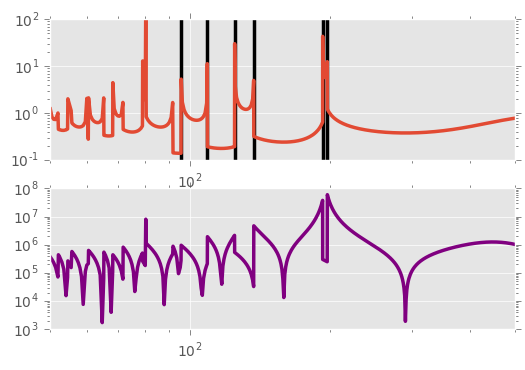

In [361]:
noZoom=mpl.gridspec.GridSpec(2,1)

rhoR = plt.subplot(noZoom[0,0])
rhoR.vlines(turnRads,0.01,1000)
rhoR.loglog(aR,aDens)
rhoR.set_xlim([rMin,rMax])
rhoR.set_ylim([0.1,100])

gradR = plt.subplot(noZoom[1,0])
#gradR.loglog(aR[aGrad>0],aGrad[aGrad>0],c='blue')
#gradR.loglog(aR[aGrad<0],-aGrad[aGrad<0],c='purple')
gradR.loglog(aR,np.abs(aGrad),c='purple')
gradR.vlines(turns,1,1e9)
gradR.set_xlim([rMin,rMax])
gradR.set_ylim([1e3,1e8])

(0.04, 100)

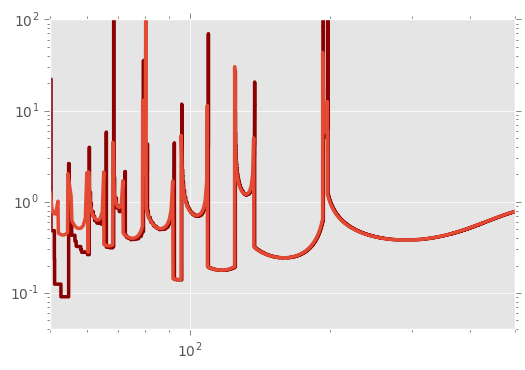

In [219]:
nBin=1000
smoothLength=1
data=np.genfromtxt('output/PointMass.4_4.txt')
rads=np.linspace(rMin,rMax,nBin)
smoothDens=cIo.findSmoothDens(rads,nBin,data,smoothLength)
boxRads,boxDens=cIo.findDens(data)
simR = plt.gca()
#simR.loglog(rads,smoothDens,color='darkblue')
simR.loglog(boxRads,boxDens,color='darkred')
simR.loglog(aR,aDens)
#simR.loglog(np.arange(250,300),(250/np.arange(250,300))**(3/2),linestyle='-')
simR.set_xlim([rMin,rMax])
simR.set_ylim([0.04,100])

(-3, 5)

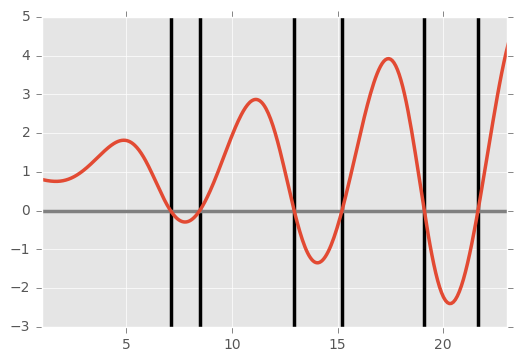

In [235]:
omegas=cAnalytic.omega(etas)
thetas=cAnalytic.theta(etas)
oEta = plt.gca()
oEta.plot([0,100],[0,0],color='gray')
oEta.vlines(turns,-3,5)
oEta.plot(etas,omegas)
oEta.set_xlim([1,23])
oEta.set_ylim([-3,5])

(50, 600)

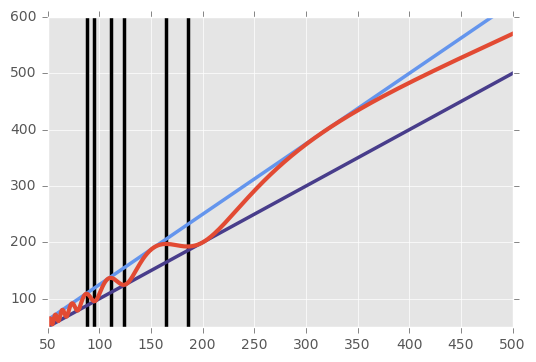

In [221]:
r0s=cAnalytic.findR0(etas)
rs=cAnalytic.findRad(etas)
rR0=plt.gca()
rR0.plot(rs,rs,color='darkslateblue')
rR0.plot(rs,(M*mu/m)*rs,color='cornflowerblue')
rR0.vlines(cAnalytic.findR0(turns),0,600)
rR0.plot(r0s,rs,linewidth=3)
rR0.set_xlim([50,500])
rR0.set_ylim([50,600])

(0, 600)

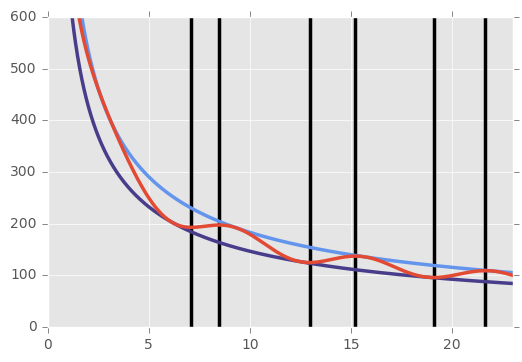

In [222]:
rMins=(G*m*(t**2)*((1-eps)**3)/(etas**2))**(1/3)
rMaxs=(G*m*(t**2)*((1+eps)**3)/(etas**2))**(1/3)
rEta=plt.gca()
rEta.plot(etas,rMins,color='darkslateblue')
rEta.plot(etas,rMaxs,color='cornflowerblue')
rEta.vlines(turns,0,600)
rEta.plot(etas,rs)
rEta.set_xlim([0,23])
rEta.set_ylim([0,600])

eta:  1.00000230259
R:  766.961509798
eta:  1.04761814065
R:  746.225699558
eta:  1.09750124153
R:  726.228902584


/Users/Zephyr/Google Drive/astro/caustics/causticTools/analytic.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  return ((G*m*(t**2))*((1-eps*np.cos(eta))**3)/((eta-eps*np.sin(eta))**2))**(1/3)


eta:  1.14975956259
R:  706.945493978
eta:  1.20450620167
R:  688.34910177
eta:  1.26185964186
R:  670.41238656
eta:  1.32194400787
R:  653.106806313
eta:  1.38488933474
R:  636.402368266
eta:  1.4508318492
R:  620.267371087
eta:  1.51991426452
R:  604.668141943
eta:  1.59228608937
R:  589.568774981
eta:  1.66810395138
R:  574.930879977
eta:  1.74753193611
R:  560.713352587
eta:  1.83074194219
R:  546.872180808
eta:  1.91791405332
R:  533.360305834
eta:  2.00923692802
R:  520.127559659
eta:  2.10490820793
R:  507.120706287
eta:  2.20513494551
R:  494.283618353
eta:  2.31013405222
R:  481.557626147
eta:  2.42013276787
R:  468.882081261
eta:  2.53536915249
R:  456.195182147
eta:  2.65609260151
R:  443.435113289
eta:  2.7825643855
R:  430.541552945
eta:  2.9150582156
R:  417.45760571
eta:  3.05386083593
R:  404.132214286
eta:  3.19927264414
R:  390.523098249
eta:  3.35160834152
R:  376.600253917
eta:  3.51119761409
R:  362.35002537
eta:  3.67838584612
R:  347.77971768
eta:  3.85353486761


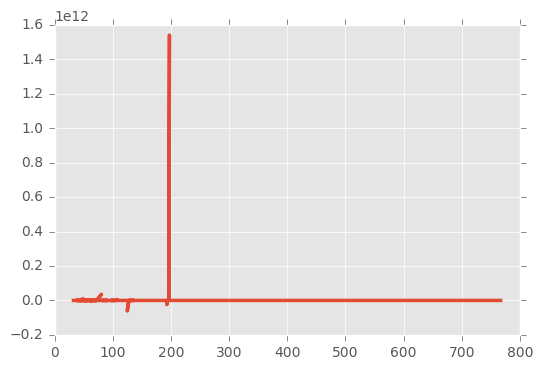

In [241]:
import causticTools.analytic as cAnalytic
%autoreload 2
gradEtas=10**(np.linspace(1e-6,np.log10(100),num=100))
gradRs=cAnalytic.findRad(gradEtas)
dRho_dr=np.zeros(100)
for i in range(100):
    dRho_dr[i]=cAnalytic.dRho_dr(gradEtas[i])
gradR=plt.gca()
gradR.plot(gradRs,dRho_dr)

(11244.062341525945, 50000000)

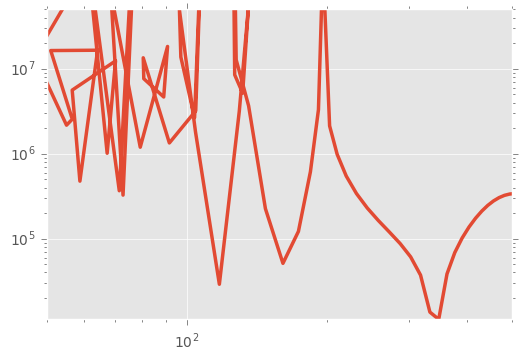

In [253]:
gradR=plt.gca()
gradR.loglog(gradRs,np.abs(dRho_dr))
gradR.set_xlim([50,500])
gradR.set_ylim([0,50000000])

# How steep are caustics?

In [362]:
nR=512
cMin=180
cMax=210
zMin=192.62
zMax=195
cR,cDens,cGrad=cAnalytic.densProfile(cMin,cMax,nR,M,m,t,returnGradient=1)
zR,zDens,zGrad=cAnalytic.densProfile(zMin,zMax,nR,M,m,t,returnGradient=1)

/Users/Zephyr/Google Drive/astro/caustics/causticTools/analytic.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  return ((G*m*(t**2))*((1-eps*np.cos(eta))**3)/((eta-eps*np.sin(eta))**2))**(1/3)


In [284]:
print(turnRads.size)

6


(100000.0, 100000000.0)

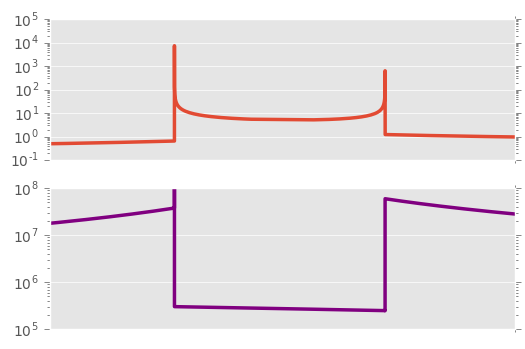

In [366]:
midZoom=mpl.gridspec.GridSpec(2,1)

cRhoR = plt.subplot(midZoom[0,0])
cRhoR.loglog(cR,cDens)
#rhoR.loglog(aR,threeOver*aDens[-1]/threeOver[-1],linestyle='-')
#rhoR.loglog(aR,three*aDens[-1]/three[-1],linestyle='-')
cRhoR.set_xlim([190,200])
cRhoR.set_ylim([0.1,1e5])

cGradR = plt.subplot(midZoom[1,0])
#gradR.loglog(aR[aGrad>0],aGrad[aGrad>0],c='blue')
#gradR.loglog(aR[aGrad<0],-aGrad[aGrad<0],c='purple')
cGradR.loglog(cR,np.abs(cGrad),c='purple')
cGradR.vlines(turns,1,1e9)
cGradR.set_xlim([190,200])
cGradR.set_ylim([1e5,1e8])

(0.1, 100000.0)

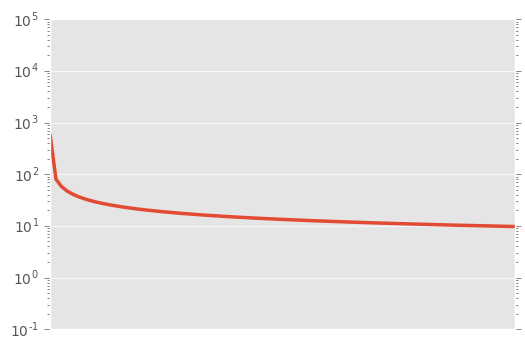

In [291]:
zRhoR = plt.gca()
zRhoR.loglog(zR,zDens)
#rhoR.loglog(aR,threeOver*aDens[-1]/threeOver[-1],linestyle='-')
#rhoR.loglog(aR,three*aDens[-1]/three[-1],linestyle='-')
zRhoR.set_xlim([192.62,193])
zRhoR.set_ylim([0.1,1e5])

(0.0001, 2)

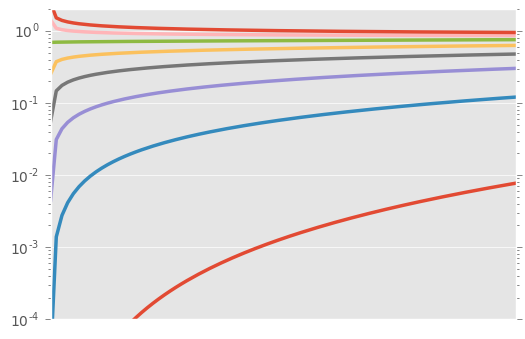

In [308]:
powerR = plt.gca()
for i in range(1,9):
    power=np.power(1/(zR-turnRads[0]),3/i)
    power=power*(zDens[-1]/power[-1])
    powerR.loglog(zR,zDens/power)
#rhoR.loglog(aR,threeOver*aDens[-1]/threeOver[-1],linestyle='-')
#rhoR.loglog(aR,three*aDens[-1]/three[-1],linestyle='-')
powerR.set_xlim([192.62,193])
powerR.set_ylim([0.0001,2])

(1000000.0, 1000000000.0)

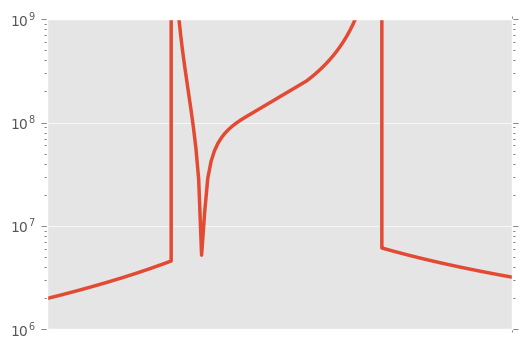

In [326]:
gradRad=plt.gca()
gradRad.loglog(cR,np.abs(cGrad))
gradRad.vlines(turns,1,1e9)
gradRad.set_xlim([190,200])
gradRad.set_ylim([1e6,1e9])